In [24]:
# Load necessary modules and libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared,DotProduct

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Load the data


Geometry1 = pd.read_csv('Surface_features.csv',header=0, usecols=(4,8,9,10,11,12,14))
Geometry = pd.read_csv('Surface_features.csv',header=0, usecols=(4,6,7,8,9,10,11,12)).values


Ra_ch = pd.read_csv('Surface_features.csv',header=0,usecols=(5,)).values
Ra_ch = Ra_ch[:,0]
ks = pd.read_csv('Surface_features.csv',header=0,usecols=(13,)).values
ks = ks[:,0]



Geometry1["ks"]= np.divide(ks,Ra_ch)
Geometry1["krms_ch"]= np.divide(Geometry1["krms_ch"],Ra_ch)

Geometry1.rename({'krms_ch': '$k_{rms}/R_a$',
                  'pro_ch': '$P_o$',
                  'ESx_ch': '$E_x$',
                  'ESz_ch': '$E_z$',
                  'sk_ch': '$S_k$',
                  'ku_ch': '$K_u$',
                  'ks': '$k_s/R_a$',
                  'label': 'Label',
                  }, axis='columns', errors="raise",inplace = True)


/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


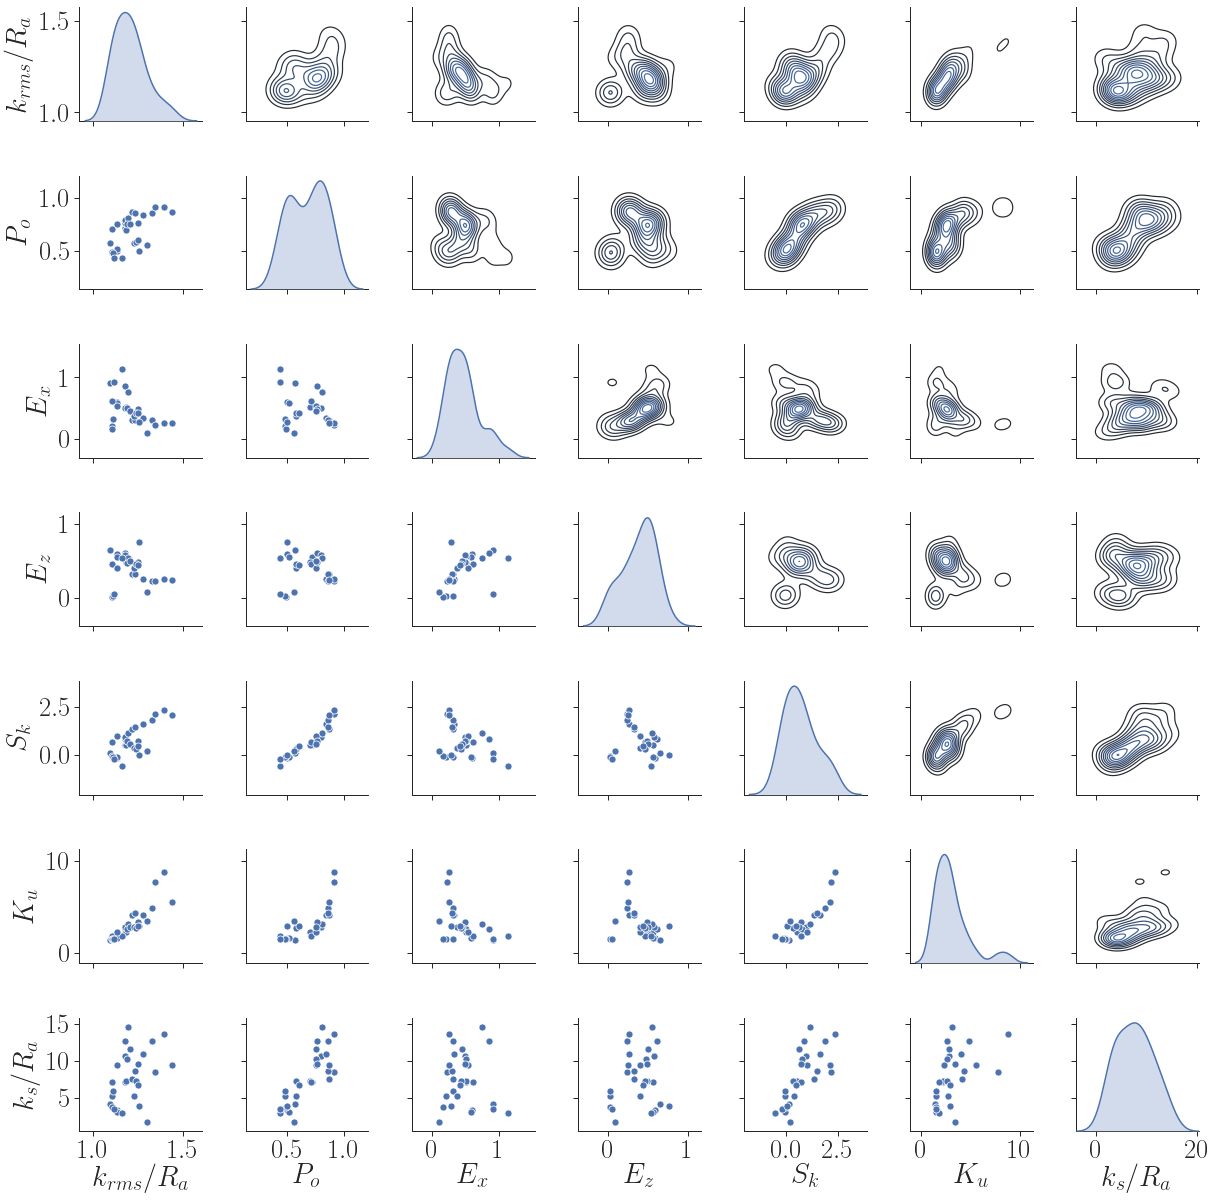

In [26]:
# Plot raw data

plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=3, color_codes=True, rc=None)


g = sns.pairplot(Geometry1,diag_kind="kde", palette="seismic", #hue='Label',
                 plot_kws=dict(s=70,facecolor="w", edgecolor="w", linewidth=1),
                 diag_kws=dict(linewidth=1.5))
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot, s=50,)

plt.savefig('pair.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)



In [27]:
# Data reconfiguration, to be used in ML

X = Geometry
y = np.divide(ks,Ra_ch)


X[:,0] = np.divide(X[:,0],Ra_ch)
X[:,2] = np.abs(X[:,2])


# Generate secondary features and append them to the original dataset

n,m = X.shape 
X0 = np.ones((n,1))
X1 = np.ones((n,1))
X2 = np.ones((n,1))
X3 = np.ones((n,1))
X4 = np.ones((n,1))
X5 = np.ones((n,1))
X6 = np.ones((n,1))
X7 = np.ones((n,1))
X8 = np.ones((n,1))
X9 = np.ones((n,1))




X1[:,0] = np.transpose(X[:,4]*X[:,5])
X2[:,0] = np.transpose(X[:,4]*X[:,6])
X3[:,0] = np.transpose(X[:,4]*X[:,7])
X4[:,0] = np.transpose(X[:,5]*X[:,6])
X5[:,0] = np.transpose(X[:,5]*X[:,7])
X6[:,0] = np.transpose(X[:,6]*X[:,7])
X7[:,0] = np.transpose(X[:,4]*X[:,4])
X8[:,0] = np.transpose(X[:,5]*X[:,5])
X9[:,0] = np.transpose(X[:,6]*X[:,6])




X = np.hstack((X,X1))
X = np.hstack((X,X2))
X = np.hstack((X,X3))
X = np.hstack((X,X4))
X = np.hstack((X,X5))
X = np.hstack((X,X6))
X = np.hstack((X,X7))
X = np.hstack((X,X8))
X = np.hstack((X,X9))




In [28]:
# Load the trained ML network


loaded_model = pickle.load(open('DNN_best.sav', 'rb'))
loaded_model.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 14, 9),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 200000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 1e-05,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [29]:


yn = loaded_model.predict(X)
print("Max err: %f" % max(100.*abs(yn-y)/(y)))
print("mean err: %f" % np.mean(100.*abs(yn-y)/(y)))  


Error=pd.DataFrame()
Error["$k_s/Ra$"]= y
Error["$k_{sp}/Ra$"]= yn
Error["$error(\%)$"]= (100.*(yn-y)/(y))
Error["Label"]= Geometry1["Label"]

print(Error)

Max err: 27.020691
mean err: 7.380686
     $k_s/Ra$  $k_{sp}/Ra$  $error(\%)$ Label
0    3.319588     2.608326   -21.426211   DNS
1    4.174497     3.824065    -8.394592   DNS
2    3.051813     3.054049     0.073259   DNS
3    7.168421     6.870210    -4.160071   DNS
4   12.688976    12.088118    -4.735279   DNS
5    7.243094     6.869843    -5.153199   DNS
6   10.628458    10.643096     0.137721   DNS
7   14.615804    14.465431    -1.028838   DNS
8   10.214286    10.094552    -1.172217   DNS
9    7.137056     7.305751     2.363648   DNS
10  10.986014    10.573755    -3.752581   DNS
11   2.927481     2.542322   -13.156672   DNS
12   9.481752     9.941930     4.853298   DNS
13  12.641026    11.719527    -7.289742   DNS
14   9.530120     9.426171    -1.090748   DNS
15   7.604317     7.690516     1.133562   DNS
16   8.558333     7.072446   -17.361879   DNS
17  11.581590    10.366355   -10.492814   DNS
18   8.668317     8.463466    -2.363212   DNS
19  13.700000    13.569267    -0.954257   

/home/mostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


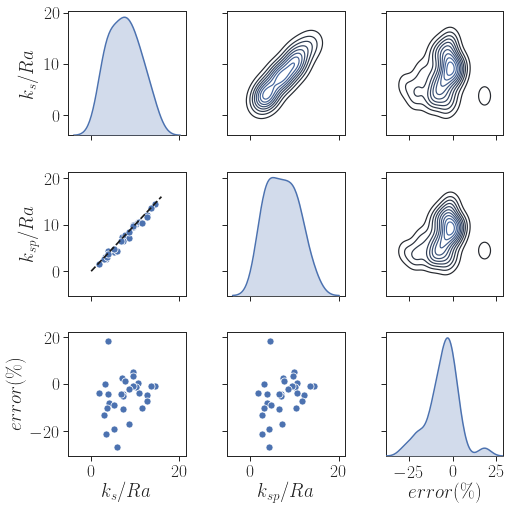

In [30]:
# Plot the results


plt.rc('text', usetex=True)

sns.set(context='paper',
            style='ticks', 
            palette='deep',
            font='sans-serif', 
            font_scale=2, color_codes=True, rc=None)

g = sns.pairplot(Error,diag_kind="kde", palette="seismic", #hue='Label',
                 aspect=1.,
                 plot_kws=dict(s=50,facecolor="w", edgecolor="w", linewidth=1.),
                 diag_kws=dict(linewidth=1.5,kernel='gau'))

g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot, s=50,legend='full')
g.axes[-2,0].plot(range(17), range(17),'k--', linewidth= 1.7)


for i in range(0,3):
    for ax in g.axes[:,i]:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)




plt.savefig('DNN_result.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

